In [65]:

###################################################################
#  Import Libraries
###################################################################
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable


###################################################################
#  Get and Organize the data
###################################################################
# We are trying a linear model here. So data should be a column
# x_train should have as many rows as y_correct
# x_train can have multiple colunmns. but in this case the model must
# have input_dim equal to the number of columns

# Define Data 1 
# This is data entered manually to shape scalars as a numpy array column
x_train = np.asarray([[1],[2],[1],[1],[4],[3]],dtype = np.uint8)
y_correct =  np.asarray([[3],[6],[6],[4],[12],[9]],dtype = np.uint8)

# Define Data 2
# alternatively, you can make the process more automatic
domain_size = 18
x_train = np.arange(domain_size,dtype=np.float64)
x_train = np.reshape(x_train, (domain_size,1))
error =  (np.random.rand(x_train.shape[0],x_train.shape[1])-0.5) *2
bias = 10
y_correct = x_train * 5  + error + bias


###################################################################
#  Define the model
###################################################################
class MyLinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        """
        nn.Module is just an other name for network or module
        in __init__() you define the layers of the network
        you should specify them with the number of inputs and outputs
        nn.Linear for linear layers
        """
        super().__init__() # Calling Super Class's constructor
        self.linear = nn.Linear(input_dim, output_dim)
        # nn.linear is defined in nn.Module

    def forward(self, x):
        # Here the forward pass is simply a linear function
        out = self.linear(x)
        return out

input_dim = 1
output_dim = 1

###################################################################
#  TRAINING
###################################################################
# initialize the model
model = MyLinearRegressionModel(input_dim,output_dim)

# Establish the Learning rules
criterion = nn.MSELoss()# Establish loss function: Mean Squared Loss
l_rate = 0.01 # learning rate
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) # Optimization rule: Stochastic Gradient Descent
epochs = 2000

# Run training
for epoch in range(epochs):
    epoch +=1 #increase the number of epochs by 1 every time
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_correct))

    # Clears grads else they will be accumulated
    optimiser.zero_grad()

    # Runs forward to get predicted values
    outputs = model.forward(inputs.float())
    loss = criterion(outputs, labels.float()) # This calculates the loss (or error)
    loss.backward()# This getts the gradients with respect to the parameters
    optimiser.step()# This updates the parameters
    
    print('epoch {}, loss {}'.format(epoch,loss.data))

epoch 1, loss 3368.729736328125
epoch 2, loss 3354.72802734375
epoch 3, loss 3340.7841796875
epoch 4, loss 3326.900390625
epoch 5, loss 3313.076416015625
epoch 6, loss 3299.30908203125
epoch 7, loss 3285.599609375
epoch 8, loss 3271.949462890625
epoch 9, loss 3258.357421875
epoch 10, loss 3244.82177734375
epoch 11, loss 3231.343994140625
epoch 12, loss 3217.924072265625
epoch 13, loss 3204.55859375
epoch 14, loss 3191.250732421875
epoch 15, loss 3177.99951171875
epoch 16, loss 3164.803955078125
epoch 17, loss 3151.664306640625
epoch 18, loss 3138.579833984375
epoch 19, loss 3125.550537109375
epoch 20, loss 3112.576904296875
epoch 21, loss 3099.6572265625
epoch 22, loss 3086.792724609375
epoch 23, loss 3073.9833984375
epoch 24, loss 3061.22607421875
epoch 25, loss 3048.52392578125
epoch 26, loss 3035.87451171875
epoch 27, loss 3023.27783203125
epoch 28, loss 3010.736572265625
epoch 29, loss 2998.24755859375
epoch 30, loss 2985.810791015625
epoch 31, loss 2973.425537109375
epoch 32, loss

epoch 408, loss 626.7930297851562
epoch 409, loss 624.2177734375
epoch 410, loss 621.6531982421875
epoch 411, loss 619.0991821289062
epoch 412, loss 616.5556640625
epoch 413, loss 614.0226440429688
epoch 414, loss 611.5001831054688
epoch 415, loss 608.98779296875
epoch 416, loss 606.4859008789062
epoch 417, loss 603.9942016601562
epoch 418, loss 601.5130004882812
epoch 419, loss 599.0418701171875
epoch 420, loss 596.5809326171875
epoch 421, loss 594.1300659179688
epoch 422, loss 591.6893310546875
epoch 423, loss 589.2584838867188
epoch 424, loss 586.837646484375
epoch 425, loss 584.4266967773438
epoch 426, loss 582.02587890625
epoch 427, loss 579.6349487304688
epoch 428, loss 577.2536010742188
epoch 429, loss 574.8821411132812
epoch 430, loss 572.5206298828125
epoch 431, loss 570.1687622070312
epoch 432, loss 567.8265991210938
epoch 433, loss 565.4938354492188
epoch 434, loss 563.1710205078125
epoch 435, loss 560.857666015625
epoch 436, loss 558.553466796875
epoch 437, loss 556.2589111

epoch 833, loss 109.18303680419922
epoch 834, loss 108.73562622070312
epoch 835, loss 108.29007720947266
epoch 836, loss 107.84635162353516
epoch 837, loss 107.4044418334961
epoch 838, loss 106.96440887451172
epoch 839, loss 106.52616882324219
epoch 840, loss 106.08973693847656
epoch 841, loss 105.65506744384766
epoch 842, loss 105.22218322753906
epoch 843, loss 104.79109954833984
epoch 844, loss 104.36174774169922
epoch 845, loss 103.93419647216797
epoch 846, loss 103.50840759277344
epoch 847, loss 103.08430480957031
epoch 848, loss 102.6618881225586
epoch 849, loss 102.2413101196289
epoch 850, loss 101.82246398925781
epoch 851, loss 101.40531158447266
epoch 852, loss 100.9897689819336
epoch 853, loss 100.57603454589844
epoch 854, loss 100.1640853881836
epoch 855, loss 99.75370788574219
epoch 856, loss 99.34495544433594
epoch 857, loss 98.93794250488281
epoch 858, loss 98.53260803222656
epoch 859, loss 98.1289291381836
epoch 860, loss 97.72696685791016
epoch 861, loss 97.3266448974609

epoch 1255, loss 19.43436622619629
epoch 1256, loss 19.355545043945312
epoch 1257, loss 19.277084350585938
epoch 1258, loss 19.1989688873291
epoch 1259, loss 19.121173858642578
epoch 1260, loss 19.043703079223633
epoch 1261, loss 18.966533660888672
epoch 1262, loss 18.889686584472656
epoch 1263, loss 18.813146591186523
epoch 1264, loss 18.736915588378906
epoch 1265, loss 18.66101837158203
epoch 1266, loss 18.585420608520508
epoch 1267, loss 18.5101261138916
epoch 1268, loss 18.435121536254883
epoch 1269, loss 18.360448837280273
epoch 1270, loss 18.286073684692383
epoch 1271, loss 18.212013244628906
epoch 1272, loss 18.138261795043945
epoch 1273, loss 18.06478500366211
epoch 1274, loss 17.991636276245117
epoch 1275, loss 17.91879653930664
epoch 1276, loss 17.846229553222656
epoch 1277, loss 17.773971557617188
epoch 1278, loss 17.7020206451416
epoch 1279, loss 17.630338668823242
epoch 1280, loss 17.55896759033203
epoch 1281, loss 17.487905502319336
epoch 1282, loss 17.417118072509766
epo

epoch 1673, loss 3.6860649585723877
epoch 1674, loss 3.6719467639923096
epoch 1675, loss 3.6578989028930664
epoch 1676, loss 3.64391827583313
epoch 1677, loss 3.629988193511963
epoch 1678, loss 3.6161134243011475
epoch 1679, loss 3.6022939682006836
epoch 1680, loss 3.588547706604004
epoch 1681, loss 3.574855327606201
epoch 1682, loss 3.561220407485962
epoch 1683, loss 3.547632932662964
epoch 1684, loss 3.5340940952301025
epoch 1685, loss 3.520624876022339
epoch 1686, loss 3.5071983337402344
epoch 1687, loss 3.493833303451538
epoch 1688, loss 3.480513095855713
epoch 1689, loss 3.4672555923461914
epoch 1690, loss 3.4540534019470215
epoch 1691, loss 3.4409122467041016
epoch 1692, loss 3.42781138420105
epoch 1693, loss 3.414776563644409
epoch 1694, loss 3.4017930030822754
epoch 1695, loss 3.3888468742370605
epoch 1696, loss 3.375950813293457
epoch 1697, loss 3.3631160259246826
epoch 1698, loss 3.350334882736206
epoch 1699, loss 3.337599039077759
epoch 1700, loss 3.3249306678771973
epoch 17

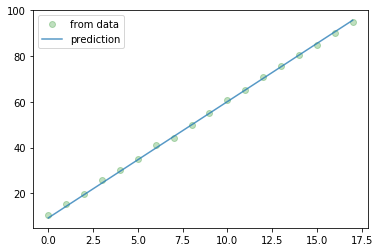

[[ 9.208311]
 [14.294506]
 [19.380701]
 [24.466896]
 [29.553091]
 [34.639286]
 [39.72548 ]
 [44.811676]
 [49.897873]
 [54.98407 ]
 [60.07026 ]
 [65.156456]
 [70.24265 ]
 [75.32885 ]
 [80.41504 ]
 [85.501236]
 [90.58743 ]
 [95.67363 ]]


In [64]:
###################################################################
# Show real data on top of the prediction
###################################################################
predicted = model.forward(Variable(torch.from_numpy(x_train)).float()).data.numpy()
plt.plot(x_train, y_correct, 'go', label = 'from data', alpha = 0.25)
plt.plot(x_train, predicted, label = 'prediction', alpha = 0.75)
plt.legend()
plt.show()
print(predicted)

In [59]:
###################################################################
# How to save a trained model
###################################################################
save_model = False
if save_model is True:
    # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(), 'awesome_linear_model.pkl')
    
# Shows the content of what will be saved
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[5.0022]])), ('linear.bias', tensor([0.9746]))])


In [18]:
###################################################################
# How to load a trained model
###################################################################
load_model = True
if load_model is True:
    model.load_state_dict(torch.load('awesome_linear_model.pkl'))

MyLinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


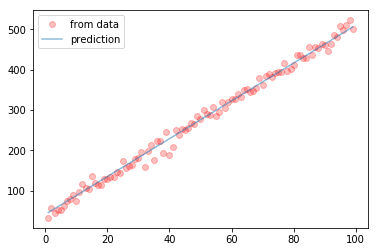

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [77]
 [78]
 [79]
 [80]
 [81]
 [82]
 [83]
 [84]
 [85]
 [86]
 [87]
 [88]
 [89]
 [90]
 [91]
 [92]
 [93]
 [94]
 [95]
 [96]
 [97]
 [98]
 [99]] [[ 32.87444537]
 [ 56.65619381]
 [ 45.1761277 ]
 [ 51.60662221]
 [ 53.27109126]
 [ 61.97156352]
 [ 74.29956315]
 [ 79.15311136]
 [ 90.31687479]
 [ 75.59716878]
 [ 96.12692407]
 [116.24652448]
 [107.63529304]
 [105.2607028 ]
 [137.70959195]
 [119.29299919]
 [113.85796882]
 [114.85557761]
 [129.44868392]
 [128.80124315]
 [132.94086512]
 [134.94147609]
 [147.35700861]
 [144.29337895]
 [172.64184253]
 [157

In [45]:
###################################################################
# How to use the model on new data
###################################################################
print(model.eval()) # Shows the model and describes its parameters

#Load data to be predicted
x = np.reshape(np.arange(1,100),(np.arange(1,100).shape[0],1))
data = Variable(torch.from_numpy(x)).float()

# Calculate the prediction
#output = model.forward(data)
#prediction = torch.argmax(output)
#predicted = prediction.data.numpy()

# Calculate the prediction
predicted = model.forward(Variable(torch.from_numpy(x)).float()).data.numpy()


# "real data"
y = x*4.68 +41 + np.random.randn(np.arange(1,100).shape[0],1)*12

# Visualize the data
plt.plot(x, y, 'go', label = 'from data', alpha = 0.25, color='r')
plt.plot(x, predicted, label = 'prediction', alpha = 0.5)
plt.legend()
plt.show()
print(x,y)

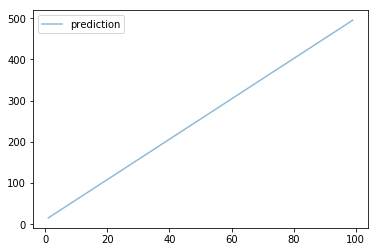

tensor([[ 46.2167],
        [ 50.9013],
        [ 55.5860],
        [ 60.2706],
        [ 64.9553],
        [ 69.6399],
        [ 74.3246],
        [ 79.0092],
        [ 83.6939],
        [ 88.3785],
        [ 93.0632],
        [ 97.7478],
        [102.4325],
        [107.1171],
        [111.8018],
        [116.4864],
        [121.1711],
        [125.8557],
        [130.5404],
        [135.2250],
        [139.9097],
        [144.5943],
        [149.2790],
        [153.9637],
        [158.6483],
        [163.3329],
        [168.0176],
        [172.7022],
        [177.3869],
        [182.0715],
        [186.7562],
        [191.4409],
        [196.1255],
        [200.8102],
        [205.4948],
        [210.1794],
        [214.8641],
        [219.5488],
        [224.2334],
        [228.9181],
        [233.6027],
        [238.2874],
        [242.9720],
        [247.6566],
        [252.3413],
        [257.0260],
        [261.7106],
        [266.3953],
        [271.0799],
        [275.7646],


In [66]:
predicted = model.forward(Variable(torch.from_numpy(x)).float()).data.numpy()
plt.plot(x, predicted, label = 'prediction', alpha = 0.5)
plt.legend()
plt.show()
print(output)

In [67]:
predicted = model.forward(Variable(torch.from_numpy(x)).float()).data.numpy()
?torch.argmax

In [68]:
print(np.reshape(np.arange(1,100),(len(np.arange(1,100))-1,1)))

ValueError: cannot reshape array of size 99 into shape (98,1)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],

In [1]:
prediction

NameError: name 'prediction' is not defined